# 데이터 로드 및 체크

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
# 데이터 로드
data = pd.read_csv('trip.csv')

In [3]:
# 데이터 확인 5줄
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [4]:
# 데이터 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [5]:
# 데이터 통계 출력

data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


# 결측치 판단 및 처리

In [23]:
# 결측치 확인 fare_amount에서 NULL 값이 3개 들어간 것을 확인

data.isna().sum()

# 결측치 비율 확인
data.isna().mean()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              0
tip_amount               0
tolls_amount             0
dtype: int64

In [19]:
# 결측치 제거 방법 
# 1. NULL 값을 중간값으로 채우기 <- 평균으로 할 경우 현재 이상치 때문에 값이 이상하게 나옴
data['fare_amount'] = data['fare_amount'].fillna(data['fare_amount'].median())

In [29]:
# 2. NULL이 존재하는 데이터 제거하기
data = data.dropna(subset=['fare_amount'])

In [30]:
# 결측치 재 확인 NULL 값이 없어진 것을 확인

data.isna().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              0
tip_amount               0
tolls_amount             0
dtype: int64

# 이상치 판단 및 처리

<AxesSubplot:ylabel='passenger_count'>

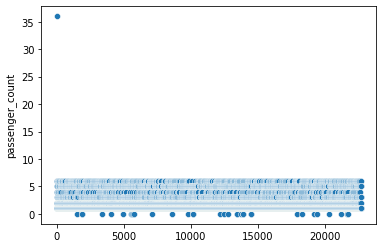

In [31]:
# 손님 수 산점도 확인 비정상적인 데이터 하나가 발견됨
sns.scatterplot(x=data.index, y=data['passenger_count'])

In [32]:
# 손님 수 데이터 정렬 6명까지는 정상적인 데이터인 것을 확인
data['passenger_count'].sort_values()

12804     0
19458     0
5565      0
5670      0
13718     0
         ..
21791     6
15629     6
4854      6
0         6
64       36
Name: passenger_count, Length: 22698, dtype: int64

In [79]:
# 이상치 제거
data = data[data['passenger_count'] < 36]

In [34]:
# 1개의 데이터가 삭제된 것을 확인
data['passenger_count'].sort_values()

12804    0
19458    0
5565     0
5670     0
13718    0
        ..
19313    6
1548     6
20526    6
19335    6
0        6
Name: passenger_count, Length: 22697, dtype: int64

<AxesSubplot:ylabel='trip_distance'>

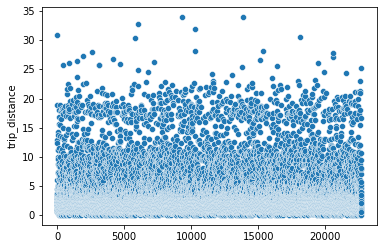

In [58]:
# trip_distance 이동 거리 0인 경우가 관측됨
sns.scatterplot(x=data.index, y=data['trip_distance'])

In [95]:
data['trip_distance'].sort_values()

4912      0.00
12924     0.00
22028     0.00
16402     0.00
649       0.00
         ...  
30       30.83
10293    31.95
6066     32.72
13863    33.92
9282     33.96
Name: trip_distance, Length: 22675, dtype: float64

In [98]:
# 확인을 했으나 데이터상 문제점은 관측되지 않음.
data[data['trip_distance'] < 0.2]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
129,Linda Kaufman,06/22/2017 8:05:33 AM,06/22/2017 8:05:40 AM,Debit Card,1,0.00,20.0,0.00,0.0
248,Erik Perez,09/18/2017 8:50:53 PM,09/18/2017 8:51:03 PM,Cash,1,0.00,2.5,0.00,0.0
293,Deborah Sanford,10/04/2017 7:46:24 PM,10/04/2017 7:46:50 PM,Cash,1,0.00,2.5,0.00,0.0
321,Ryan Hughes,02/22/2017 4:01:44 AM,02/22/2017 4:01:53 AM,Cash,1,0.00,2.5,0.00,0.0
325,Valerie Mullen,01/14/2017 7:04:51 PM,01/14/2017 7:05:01 PM,Cash,2,0.02,2.5,0.00,0.0
...,...,...,...,...,...,...,...,...,...
22327,Kelsey Rogers,07/21/2017 11:30:29 PM,07/21/2017 11:31:12 PM,Debit Card,1,0.00,16.8,3.42,0.0
22385,Joseph Castillo,01/07/2017 4:48:42 AM,01/07/2017 4:51:03 AM,Cash,1,0.00,10.0,0.00,0.0
22498,Ronald Roberts,05/22/2017 12:16:37 PM,05/22/2017 12:21:54 PM,Debit Card,1,0.10,5.0,1.15,0.0
22525,Lisa Jacobs,04/26/2017 7:03:15 PM,04/26/2017 7:03:38 PM,Debit Card,2,0.08,2.5,1.29,0.0


<AxesSubplot:ylabel='fare_amount'>

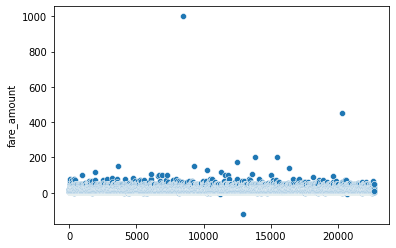

In [59]:
# fare_amount 에서 이상치가 여러개가 발견됨.
sns.scatterplot(x=data.index, y=data['fare_amount'])

In [78]:
# 음수 데이터와 0원과 극단적인 값이 존재하는 것을 확인
data['fare_amount'].sort_values()

4063       0.01
14285      0.01
13972      1.00
16343      2.50
16351      2.50
          ...  
12513    175.00
15476    200.00
13863    200.01
20314    450.00
8478     999.99
Name: fare_amount, Length: 22678, dtype: float64

In [76]:
# 환불 여부를 확인할 수 없기 때문에 음수 데이터와 0원은 삭제를 진행
data[data['fare_amount'] < 0]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
316,Tiffany Johnson,12/13/2017 2:02:39 AM,12/13/2017 2:03:08 AM,Cash,6,0.12,-2.5,0.0,0.0
1648,Debbie Holmes,07/05/2017 11:02:23 AM,07/05/2017 11:03:00 AM,Credit Card,1,0.04,-2.5,0.0,0.0
4425,Bobby Wilson,11/16/2017 8:13:30 PM,11/16/2017 8:14:50 PM,Cash,2,0.06,-3.0,0.0,0.0
5450,Alejandro Williams,04/06/2017 12:50:26 PM,04/06/2017 12:52:39 PM,Debit Card,1,0.25,-3.5,0.0,0.0
5760,Samuel Cooper,01/03/2017 8:15:23 PM,01/03/2017 8:15:39 PM,Debit Card,1,0.02,-2.5,0.0,0.0
8206,Stephanie Summers,10/28/2017 8:39:36 PM,10/28/2017 8:41:59 PM,Credit Card,1,0.41,-3.5,0.0,0.0
10283,Donna Larson,06/05/2017 5:34:25 PM,06/05/2017 5:36:29 PM,Credit Card,2,0.00,-2.5,0.0,0.0
11206,Austin Fields,07/09/2017 7:20:59 AM,07/09/2017 7:23:50 AM,Debit Card,1,0.64,-4.5,0.0,0.0
12946,Patrick Herring,04/08/2017 12:00:16 AM,04/08/2017 11:15:57 PM,Cash,1,0.17,-120.0,0.0,0.0
14716,Stefanie Warner,12/24/2017 10:37:58 PM,12/24/2017 10:41:08 PM,Debit Card,5,0.40,-4.0,0.0,0.0


In [77]:
# fare_amount 0 이하 행 삭제
data = data[data['fare_amount'] > 0]

In [90]:
# 극단값을 확인한 결과 탑승시간이 1분인데 지불한 값이 너무 비쌈 오류일 가능성이 높음
data[data['fare_amount'] > 200]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
13863,William Yates,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,Credit Card,1,33.92,200.01,51.64,5.76


In [89]:
# fare_amount 400 이상 행 삭제
data = data[data['fare_amount'] < 400]

<AxesSubplot:ylabel='tip_amount'>

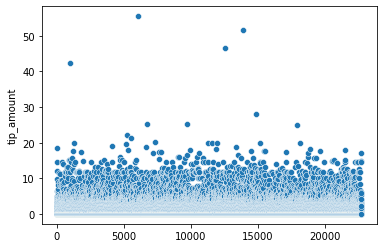

In [91]:
# tip_amount 극단값 일부가 확인
sns.scatterplot(x=data.index, y=data['tip_amount'])

In [103]:
# 음수는 존재하지 않으나 극단 값이 보임 28.00 이상
data['tip_amount'].sort_values()

11354     0.00
8261      0.00
19782     0.00
8263      0.00
8264      0.00
         ...  
13361    18.65
6643     18.92
4140     18.95
5126     19.55
18132    19.85
Name: tip_amount, Length: 22659, dtype: float64

In [100]:
# tip_amount가 20 이상인 데이터는 삭제
data[data['tip_amount'] > 20]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
986,Elaine Horton,08/23/2017 6:23:26 PM,08/23/2017 7:18:29 PM,Cash,1,16.70,52.00,42.29,0.00
5212,Randy Martinez,05/22/2017 4:28:23 PM,05/22/2017 4:29:01 PM,Debit Card,1,0.00,52.00,22.22,5.76
5538,Alexander Giles Jr.,03/16/2017 12:14:51 PM,03/16/2017 12:52:36 PM,Cash,1,17.50,69.50,21.30,15.50
6066,Tina Knight,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,Debit Card,1,32.72,107.00,55.50,16.26
6710,Nicholas Charles,10/30/2017 11:23:46 AM,10/30/2017 11:23:49 AM,Credit Card,1,0.32,100.00,25.20,0.00
7283,Phillip Vasquez,01/01/2017 3:02:53 AM,01/01/2017 3:03:02 AM,Credit Card,1,0.00,100.00,20.16,0.00
9716,Miss Karen Smith,09/28/2017 11:56:23 AM,09/28/2017 12:21:12 PM,Cash,1,10.02,30.00,25.20,5.76
12513,Mr. Wesley Reyes,12/17/2017 6:24:24 PM,12/17/2017 6:24:42 PM,Cash,1,0.00,175.00,46.69,11.75
13863,William Yates,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,Credit Card,1,33.92,200.01,51.64,5.76
14827,John Greer,11/28/2017 8:47:09 PM,11/28/2017 9:22:38 PM,Debit Card,1,20.90,57.50,28.00,2.64


In [101]:
data = data[data['tip_amount'] < 20]

<AxesSubplot:ylabel='tolls_amount'>

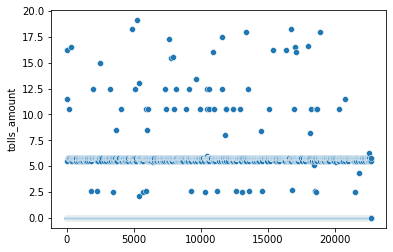

In [104]:
# 15 이상의 데이터가 확인됨
sns.scatterplot(x=data.index, y=data['tolls_amount'])

In [106]:
data[data['tip_amount'] > 15]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
30,David Burton,11/06/2017 8:30:50 PM,11/07/2017 12:00:00 AM,Credit Card,1,30.83,80.0,18.56,11.52
1112,William Garcia,09/06/2017 10:46:17 AM,09/06/2017 11:44:41 AM,Credit Card,1,19.10,52.0,15.80,0.00
1181,Kaitlyn Martin,06/19/2017 6:23:13 AM,06/19/2017 7:03:53 AM,Credit Card,6,19.77,52.0,17.57,5.76
1786,Brooke Davila,10/07/2017 4:07:48 AM,10/07/2017 4:38:42 AM,Credit Card,1,18.56,52.0,17.50,5.54
3543,George Garcia,12/07/2017 6:42:55 AM,12/07/2017 8:39:45 AM,Debit Card,6,13.45,75.5,15.26,0.00
4140,Alan Bowers,11/26/2017 3:37:35 PM,11/26/2017 4:50:22 PM,Cash,2,26.86,75.0,18.95,0.00
4671,Rodney Green,05/06/2017 2:48:13 PM,05/06/2017 3:40:59 PM,Credit Card,2,9.76,52.0,15.84,0.00
5126,Karla Fleming,12/14/2017 8:33:12 AM,12/14/2017 9:15:00 AM,Credit Card,1,16.20,65.5,19.55,12.50
5273,Melvin Henderson III,12/07/2017 1:48:52 PM,12/07/2017 2:29:07 PM,Credit Card,1,17.96,70.0,17.88,19.10
6643,Janet Duncan,12/20/2017 5:42:39 PM,12/20/2017 7:09:56 PM,Credit Card,1,17.14,52.0,18.92,5.76


In [108]:
# 팁을 15달러 이상 낸 사람 제거
data = data[data['tip_amount'] < 15]

# 택시 탑승 시간 데이터 활용

## 오전 승객이 많을까? 오후 승객이 많을까?

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22697 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22697 non-null  object 
 1   tpep_pickup_datetime   22697 non-null  object 
 2   tpep_dropoff_datetime  22697 non-null  object 
 3   payment_method         22697 non-null  object 
 4   passenger_count        22697 non-null  int64  
 5   trip_distance          22697 non-null  float64
 6   fare_amount            22697 non-null  float64
 7   tip_amount             22697 non-null  float64
 8   tolls_amount           22697 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.7+ MB


In [36]:
data['tpep_pickup_datetime']

0         03/25/2017 8:55:43 AM
1         04/11/2017 2:53:28 PM
2         12/15/2017 7:26:56 AM
3         05/07/2017 1:17:59 PM
4        04/15/2017 11:32:20 PM
                  ...          
22696     02/24/2017 5:37:23 PM
22697     08/06/2017 4:43:59 PM
22698     09/04/2017 2:54:14 PM
22699    07/15/2017 12:56:30 PM
22700     03/02/2017 1:02:49 PM
Name: tpep_pickup_datetime, Length: 22697, dtype: object

In [45]:
# 오전 오후 컬럼 생성
data['AMPM'] = data['tpep_pickup_datetime'].str.split().apply(lambda x : x[-1])

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22697 entries, 0 to 22700
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22697 non-null  object 
 1   tpep_pickup_datetime   22697 non-null  object 
 2   tpep_dropoff_datetime  22697 non-null  object 
 3   payment_method         22697 non-null  object 
 4   passenger_count        22697 non-null  int64  
 5   trip_distance          22697 non-null  float64
 6   fare_amount            22697 non-null  float64
 7   tip_amount             22697 non-null  float64
 8   tolls_amount           22697 non-null  float64
 9   AMPM                   22697 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.9+ MB


In [47]:
# 객체 수 카운트
data['AMPM'].value_counts()

PM    14678
AM     8019
Name: AMPM, dtype: int64

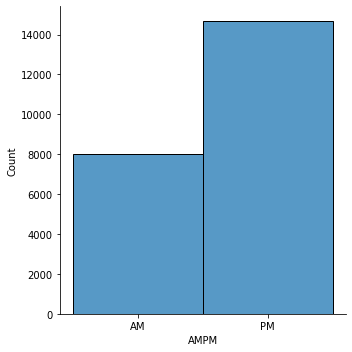

In [48]:
# 히스토그램 생성
sns.displot(data['AMPM'])

택시는 오후에 타는 손님이 더 많았다.

그러면 몇시에 사람들이 택시를 많이 탈까?

In [50]:
# 문자열 데이터 -> 날짜 데이터로 변환
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])

In [53]:
data['hour'] = data['tpep_pickup_datetime'].dt.hour

In [56]:
# 객체 수 카운트
data['hour'].value_counts().sort_values()

5      235
4      235
3      287
2      386
6      499
1      525
0      737
7      857
23    1006
8     1019
10    1040
11    1088
9     1111
12    1113
13    1127
16    1132
15    1167
22    1213
17    1216
14    1224
21    1281
20    1295
18    1449
19    1455
Name: hour, dtype: int64

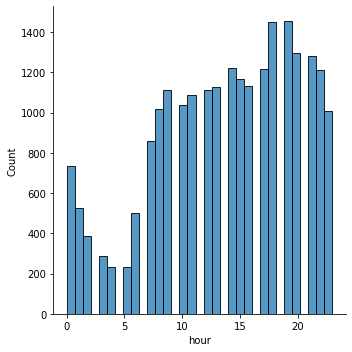

In [57]:
sns.displot(data['hour'])

퇴근시간대인 18~20시에 이용을 많이 했음을 알 수 있다

# Credit Card, Debit Card를 Card로 변경

In [110]:
data['payment_method'] = data['payment_method'].replace({"Credit Card" : "Card", "Debit Card" : "Card"})

In [111]:
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Card,1,2.36,10.5,1.70,0.00


# 탑승 시간 측정 및 이상치 제거

In [112]:
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

In [114]:
# 탑승 시간
data['time'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']

In [115]:
data['time'].sort_values()

9358    -1 days +23:43:01
8841      0 days 00:00:00
8891      0 days 00:00:00
9157      0 days 00:00:00
16588     0 days 00:00:00
               ...       
15165     0 days 23:58:33
22640     0 days 23:58:39
15000     0 days 23:58:51
15581     0 days 23:59:09
926       0 days 23:59:33
Name: time, Length: 22612, dtype: timedelta64[ns]

탑승시간이 0초 이하인 데이터가 존재함
1분 이하인 데이터는 이상치로 판단하고 제거

In [117]:
from datetime import timedelta

data[data['time'] <= timedelta(minutes=1)]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,time
129,Linda Kaufman,2017-06-22 08:05:33,2017-06-22 08:05:40,Card,1,0.00,20.0,0.00,0.0,0 days 00:00:07
162,Jonathan Flores,2017-11-11 20:16:16,2017-11-11 20:17:14,Card,1,0.23,52.0,0.00,0.0,0 days 00:00:58
248,Erik Perez,2017-09-18 20:50:53,2017-09-18 20:51:03,Cash,1,0.00,2.5,0.00,0.0,0 days 00:00:10
293,Deborah Sanford,2017-10-04 19:46:24,2017-10-04 19:46:50,Cash,1,0.00,2.5,0.00,0.0,0 days 00:00:26
321,Ryan Hughes,2017-02-22 04:01:44,2017-02-22 04:01:53,Cash,1,0.00,2.5,0.00,0.0,0 days 00:00:09
...,...,...,...,...,...,...,...,...,...,...
22327,Kelsey Rogers,2017-07-21 23:30:29,2017-07-21 23:31:12,Card,1,0.00,16.8,3.42,0.0,0 days 00:00:43
22391,Jean Smith,2017-01-26 18:06:06,2017-01-26 18:06:58,Card,1,0.30,3.0,1.00,0.0,0 days 00:00:52
22525,Lisa Jacobs,2017-04-26 19:03:15,2017-04-26 19:03:38,Card,2,0.08,2.5,1.29,0.0,0 days 00:00:23
22672,John Erickson,2017-03-03 23:09:16,2017-03-03 23:09:35,Card,1,0.00,2.5,0.00,0.0,0 days 00:00:19


In [118]:
data = data[data['time'] > timedelta(minutes=1)]

In [119]:
data['time'].sort_values()

10288   0 days 00:01:01
15127   0 days 00:01:01
4576    0 days 00:01:01
17790   0 days 00:01:01
11996   0 days 00:01:03
              ...      
15165   0 days 23:58:33
22640   0 days 23:58:39
15000   0 days 23:58:51
15581   0 days 23:59:09
926     0 days 23:59:33
Name: time, Length: 22415, dtype: timedelta64[ns]